In [2]:
# load TensorBoard
%load_ext tensorboard
# imports
import datetime
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping

from CustomData import CustomData
from NeuralNet import NeuralNet
from Visualisation import Visualisation

In [3]:
# parameters
EPOCHS = 10
BATCH_SIZE = 128

In [4]:
# generate custom data
data_gen = CustomData()

x_train, y_train = data_gen.generate_data(n=10000)
x_test, y_test = data_gen.generate_data(n=2000)

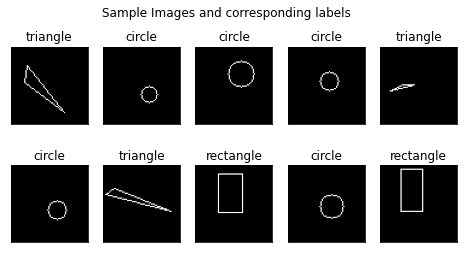

In [5]:
# show images
viz = Visualisation()

plot = viz.img_plot("Sample Images and corresponding labels", x_train, y_train)

In [6]:
# preprocessing
x_train, y_train, labels_train = data_gen.preprocessing(x_train, y_train)
x_test, y_test, labels_test = data_gen.preprocessing(x_test, y_test)

# input shape and number of classes
inp_shape = x_train.shape
num_classes = len(labels_train)

In [7]:
# initialize model
model = NeuralNet(num_classes)

In [8]:
# Callbacks
# early stopping
early_stopping = EarlyStopping(monitor="loss", mode="min", patience=2)
# tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_cb = TensorBoard(log_dir=log_dir, histogram_freq=1)

callbacks = [early_stopping, tensorboard_cb]

In [9]:
# train model
history = model.comp_and_fit(x_train, y_train, EPOCHS, BATCH_SIZE, callbacks)

Epoch 1/10
63/63 - 33s - loss: 0.2405 - accuracy: 0.8949 - val_loss: 0.0314 - val_accuracy: 0.9885
Epoch 2/10
63/63 - 30s - loss: 0.0224 - accuracy: 0.9927 - val_loss: 0.0185 - val_accuracy: 0.9940
Epoch 3/10
63/63 - 31s - loss: 0.0097 - accuracy: 0.9969 - val_loss: 0.0124 - val_accuracy: 0.9965
Epoch 4/10
63/63 - 30s - loss: 0.0066 - accuracy: 0.9981 - val_loss: 0.0125 - val_accuracy: 0.9960
Epoch 5/10
63/63 - 30s - loss: 0.0039 - accuracy: 0.9991 - val_loss: 0.0070 - val_accuracy: 0.9960
Epoch 6/10
63/63 - 30s - loss: 0.0033 - accuracy: 0.9986 - val_loss: 0.0084 - val_accuracy: 0.9960
Epoch 7/10
63/63 - 30s - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.0065 - val_accuracy: 0.9955
Epoch 8/10
63/63 - 30s - loss: 0.0028 - accuracy: 0.9991 - val_loss: 0.0176 - val_accuracy: 0.9925
Epoch 9/10
63/63 - 30s - loss: 0.0026 - accuracy: 0.9990 - val_loss: 0.0018 - val_accuracy: 0.9995
Epoch 10/10
63/63 - 30s - loss: 2.4253e-04 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 0.9980


In [10]:
%tensorboard --logdir logs

Launching TensorBoard...

In [11]:
# model evaluation
loss, accuracy = model.test_eval(x_test, y_test)
print("Accuracy:", round(accuracy * 100, 2), "%")

Accuracy: 100.0 %


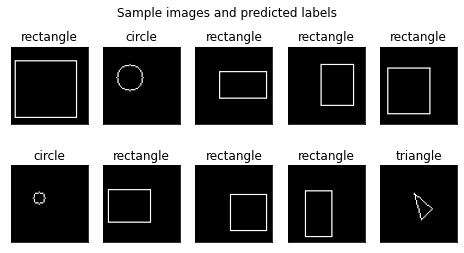

In [12]:
# predictions
y_preds = model.test_pred(x_test)
viz.img_plot("Sample images and predicted labels", x_test, labels_test[y_preds])
